# PROJECT: Melbourne Housing Project



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Describe" data-toc-modified-id="Describe-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Describe</a></span></li><li><span><a href="#Examine-and-Exploratory-Data-Analysis" data-toc-modified-id="Examine-and-Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine and Exploratory Data Analysis</a></span></li><li><span><a href="#Apply-the-model-for-prediction-with-holdout-and-cross-validation." data-toc-modified-id="Apply-the-model-for-prediction-with-holdout-and-cross-validation.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Apply the model for prediction with holdout and cross validation.</a></span></li><li><span><a href="#Using-PCA,-apply-the-model-with-holdout-and-cross-validation." data-toc-modified-id="Using-PCA,-apply-the-model-with-holdout-and-cross-validation.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Using PCA, apply the model with holdout and cross validation.</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

## Introduction


This data set contain information about 34857 information of houses in Melbourne, including price and other information. This dataset is extract from kaggle: https://www.kaggle.com/anthonypino/melbourne-housing-market. In this data set, I'll try to analize the data set and the project should follow the guideline as:

1. Examine and explore data.
2. Apply the model for prediction with holdout and cross validation.
3. Using PCA, apply the model with holdout and cross validation.
4. Visualize the residue and homoscedasticity.
5. Tune the model if necessary.
6. Write up analysis for each section.

## Describe

This dataset have some of the attribute:

    - Suburb: Suburb of Melbourne
    - Address: Address of house
    - Rooms: Number of the rooms of the house
    - Type: Type of house
    - Price: Price of house
    - Method: Method sold
    - SellerG: Name of the seller
    - Date: The day sold
    - Distance: Distance of the house to the center of Melbourne
    - Postcode: Postcode
    - Bedroom2: Number of Bedroom
    - Bathroom: Number of Bathroom
    - Car: Number of Car room 
    - Landsize: Size of the Land
    - BuildingArea: Area of building
    - YearBuilt: The year built
    - CouncilArea: Council of the area
    - Lattitude: Lattitude of the House
    - Longtitude: Longtitude of the House
    - Regionname: Name of the region
    - Propertycount: Propertycount

In [182]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import csv
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import warnings
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

df_house = pd.read_csv('Melbourne_housing_FULL.csv')
df_house = pd.DataFrame(df_house)
display(df_house)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


- The data has 34857 house.

In [183]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

- We can see It has seven columns has null as: Price, Bedroom2, Bath room, Car, Landsize, BuildingArea, Year Built, Lattitude, Longtitude.
- I will delete SellerG, CouncilArea, Lattitude, Longtitude, BuildingArea, Year Built.

In [184]:
display(df_house[df_house['Price'].isnull()])

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34829,West Melbourne,9/11 Anderson St,3,u,NaN,S,hockingstuart,24/02/2018,3.1,3003.0,...,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,2230.0
34834,Wheelers Hill,112 Jells Rd,4,h,NaN,PN,Harcourts,24/02/2018,16.7,3150.0,...,2.0,2.0,714.0,NaN,NaN,Monash City Council,-37.90287,145.19011,South-Eastern Metropolitan,7392.0
34835,Wheelers Hill,20 Mill Ct,3,h,NaN,S,Barry,24/02/2018,16.7,3150.0,...,2.0,2.0,677.0,NaN,NaN,Monash City Council,-37.91905,145.19105,South-Eastern Metropolitan,7392.0
34845,Windsor,13 Mary St,4,h,NaN,W,Jellis,24/02/2018,4.6,3181.0,...,3.0,2.0,279.0,237.0,2009.0,Port Phillip City Council,-37.85418,144.99697,Southern Metropolitan,4380.0


- The data has 7610 house with null price.
- Price are null because of the following reasons:
    + The Method sold is PN, SN, SS
    + The seller did not disclosed.

In [185]:
df_house.drop(['SellerG','Lattitude','Longtitude','CouncilArea','BuildingArea','YearBuilt'], axis=1,inplace=True)

In [186]:
df_house = df_house[df_house['Price'].notnull()]
display(df_house)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,Western Metropolitan,6543.0


- Now, this data have 27247 house have price and 15 features:
    + Area feature: Suburb, Address, Regionname.
    + Room feature: Rooms, Bedroom2, Bathroom, Car
    + Type feature
    + Method feature
    + Date feature
    + Distance feature
    + Postcode feature
    + Landsize feature
    + Propertycount feature

## Examine and Exploratory Data Analysis

- Visualize

<AxesSubplot:xlabel='Regionname', ylabel='Price'>

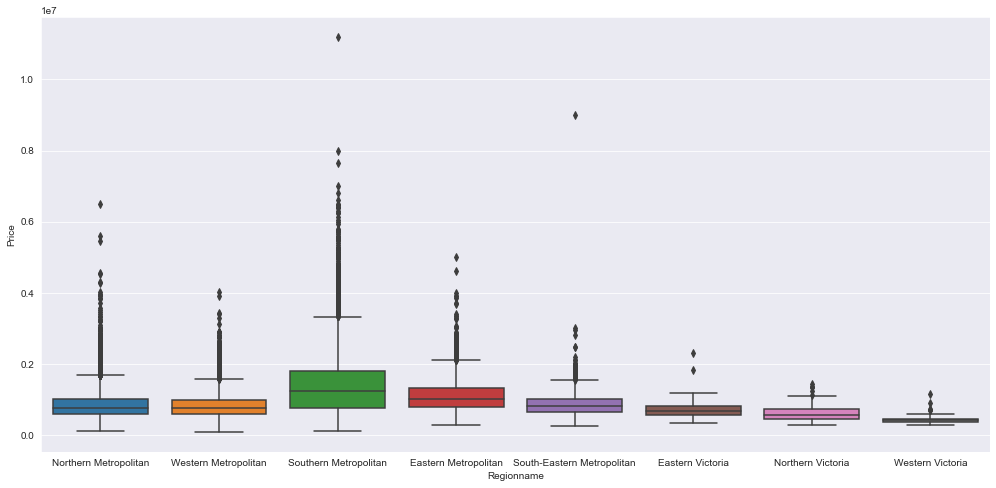

In [187]:
sns.set_style('darkgrid')

plt.figure(figsize=[17,8])
sns.boxplot(data = df_house, x = 'Regionname', y = 'Price')

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

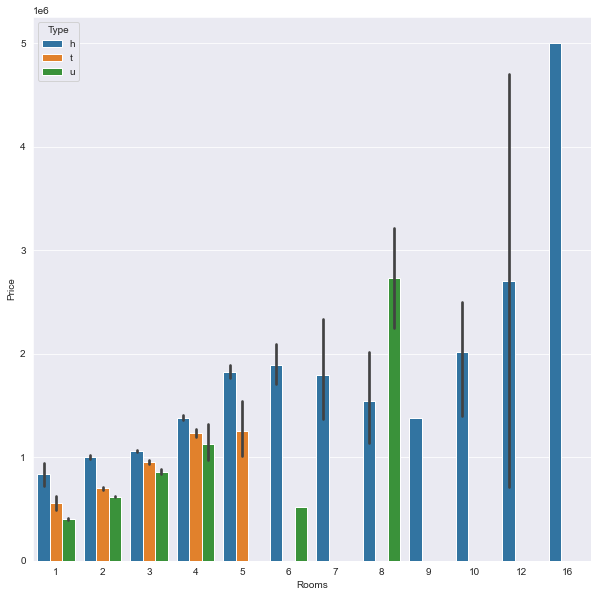

In [188]:
plt.figure(figsize=[10,10])
sns.barplot(x="Rooms",y="Price",data=df_house,hue="Type")

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

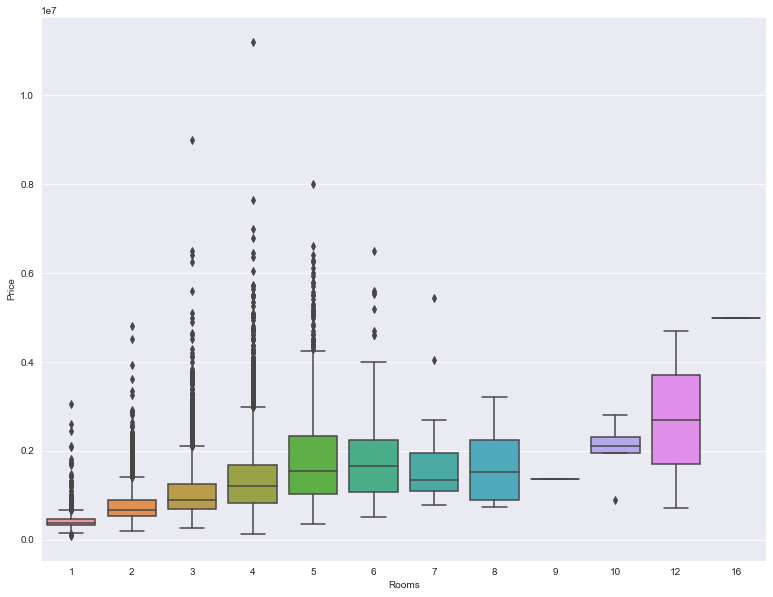

In [189]:
plt.figure(figsize=[13,10])
sns.boxplot(x = 'Rooms', y = 'Price', data = df_house)

<AxesSubplot:xlabel='Type', ylabel='Price'>

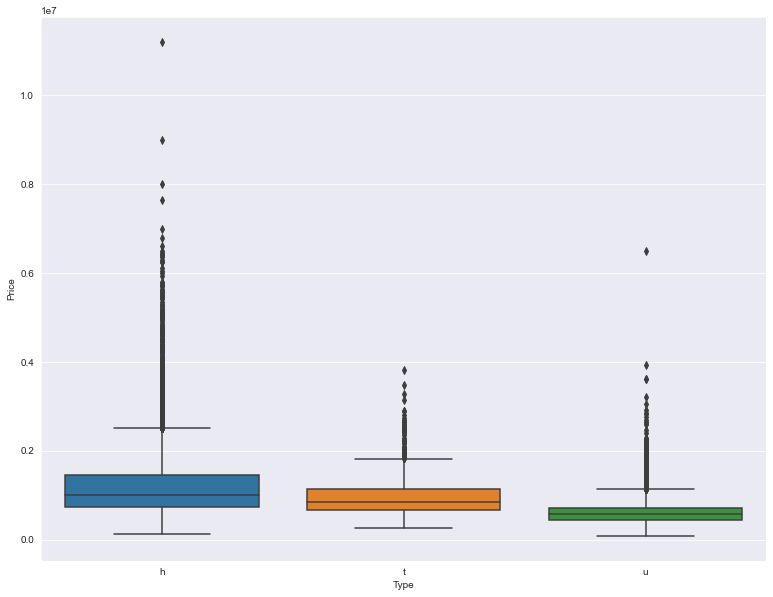

In [190]:
plt.figure(figsize=[13,10])
sns.boxplot(x = 'Type', y = 'Price', data = df_house)

In [191]:
df = pd.DataFrame(df_house[['Date','Price']])
display(df)

fig = px.scatter(df[df['Price']>0], x='Date', y='Price', range_x=['1930-01-01', '2019-12-31'],
                 title="Date and Price")
fig.show()

,Date,Price
1,3/12/2016,1480000.0
2,4/02/2016,1035000.0
4,4/03/2017,1465000.0
5,4/03/2017,850000.0
6,4/06/2016,1600000.0
...,...,...
34852,24/02/2018,1480000.0
34853,24/02/2018,888000.0
34854,24/02/2018,705000.0
34855,24/02/2018,1140000.0


 - DELETE and FILL OUT column

In [192]:
data = df_house[['Rooms','Bedroom2','Bathroom','Car']]

In [193]:
data = data.corr()

<AxesSubplot:>

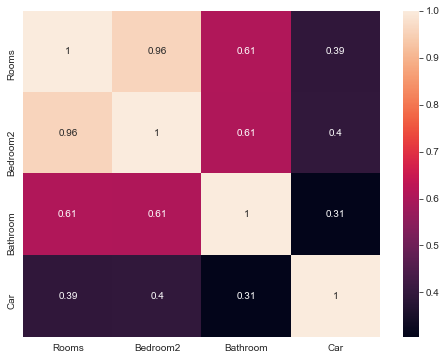

In [194]:
plt.figure(figsize=[8,6])
sns.heatmap(data,annot=True)

- This is the Correlation Matrix
- I will detele Bedroom2 column

In [195]:
df_house.drop(['Bedroom2'], axis=1,inplace=True)

- Area Feature

In [196]:
df = df_house[['Suburb','Regionname','Price']]
display(df)

,Suburb,Regionname,Price
1,Abbotsford,Northern Metropolitan,1480000.0
2,Abbotsford,Northern Metropolitan,1035000.0
4,Abbotsford,Northern Metropolitan,1465000.0
5,Abbotsford,Northern Metropolitan,850000.0
6,Abbotsford,Northern Metropolitan,1600000.0
...,...,...,...
34852,Yarraville,Western Metropolitan,1480000.0
34853,Yarraville,Western Metropolitan,888000.0
34854,Yarraville,Western Metropolitan,705000.0
34855,Yarraville,Western Metropolitan,1140000.0


In [197]:
df['number of house']=1
df_1 = df.groupby('Regionname').sum()
df_2 = df.groupby('Suburb').sum()
df_1 = df_1[df_1['number of house']>30]
df_2 = df_2[df_2['number of house']>30]
display(df_1)
display(df_2)
#fig = px.bar(df, x='production_countries', y='sum revenue',title="Countries and Sum Revenue")
#fig.show()

,Price,number of house
Regionname,,
Eastern Metropolitan,3.627742e+09,3272
Eastern Victoria,1.185785e+08,166
Northern Metropolitan,6.774711e+09,7864
Northern Victoria,1.027625e+08,166
South-Eastern Metropolitan,1.176972e+09,1341
Southern Metropolitan,1.189889e+10,8524
Western Metropolitan,4.870733e+09,5815
Western Victoria,4.153025e+07,96


,Price,number of house
Suburb,,
Abbotsford,105422000.0,102
Aberfeldie,91503500.0,70
Airport West,113456001.0,151
Albert Park,179271500.0,93
Albion,41213290.0,67
...,...,...
Windsor,85474000.0,83
Wollert,30686900.0,52
Wyndham Vale,27132800.0,53


- I have 8 regiona and 210 suburb in Melbourne with least of 30 house.
- I will delete Suburb columns and use Region name.

In [198]:
df_house.drop(['Suburb'], axis=1,inplace=True)
df_house.replace(['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan','Northern Victoria',
                  'South-Eastern Metropolitan','Southern Metropolitan','Western Metropolitan','Western Victoria']
                ,[1, 2, 3, 4, 5, 6, 7, 8],inplace=True)

In [199]:
data = df_house['Address'].str.contains('/')
t = {False: 1, True : 0}
df_house['Address'] = data.replace(t)

- Type Feature

In [200]:
df = df_house[['Type','Price']]
df['number of house']=1
df_1 = df.groupby('Type').sum()
display(df_1)

,Price,number of house
Type,,
h,2.223509e+10,18472
t,2.668467e+09,2866
u,3.710518e+09,5909


In [201]:
df_house.replace(['h', 'u', 't']
                ,[1, 2, 3],inplace=True)

- Methode feature

In [202]:
df = df_house[['Method','Price']]
df['number of house']=1
df_1 = df.groupby('Method').sum()
display(df_1)

,Price,number of house
Method,,
PI,3.638712e+09,3255
S,1.841632e+10,17515
SA,1.866759e+08,190
SP,3.167118e+09,3603
VB,3.205247e+09,2684


In [203]:
df_house.replace(['PI', 'S', 'SA', 'SP','VB']
                ,[1, 2, 3, 4, 5],inplace=True)

In [204]:
display(df_house)

,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,Regionname,Propertycount
1,1,2,1,1480000.0,2,3/12/2016,2.5,3067.0,1.0,1.0,202.0,3.0,4019.0
2,1,2,1,1035000.0,2,4/02/2016,2.5,3067.0,1.0,0.0,156.0,3.0,4019.0
4,1,3,1,1465000.0,4,4/03/2017,2.5,3067.0,2.0,0.0,134.0,3.0,4019.0
5,1,3,1,850000.0,1,4/03/2017,2.5,3067.0,2.0,1.0,94.0,3.0,4019.0
6,1,4,1,1600000.0,5,4/06/2016,2.5,3067.0,1.0,2.0,120.0,3.0,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,1,4,1,1480000.0,1,24/02/2018,6.3,3013.0,1.0,3.0,593.0,7.0,6543.0
34853,1,2,1,888000.0,4,24/02/2018,6.3,3013.0,2.0,1.0,98.0,7.0,6543.0
34854,1,2,3,705000.0,2,24/02/2018,6.3,3013.0,1.0,2.0,220.0,7.0,6543.0
34855,0,3,1,1140000.0,4,24/02/2018,6.3,3013.0,NaN,NaN,NaN,7.0,6543.0


- Date Feature

In [205]:
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day
t = []
for i in df_house['Date']:
    i = pd.to_datetime(i)
    t.append(to_integer(i))
df_house['Date'] = t

- Anova test

In [206]:
model=ols('Price ~ Rooms+Address+Type+Method+Date+Distance+Postcode+Bathroom+Car+Landsize+Regionname+Propertycount', data=df_house).fit()
print(sm.stats.anova_lm(model, typ=2))

                     sum_sq       df            F         PR(>F)
Rooms          2.515908e+14      1.0  1115.536925  3.070522e-237
Address        1.380254e+14      1.0   611.995558  7.403181e-133
Type           3.465131e+13      1.0   153.641653   3.881319e-35
Method         1.425833e+12      1.0     6.322051   1.193337e-02
Date           2.719075e+12      1.0    12.056202   5.174365e-04
Distance       1.368507e+15      1.0  6067.871078   0.000000e+00
Postcode       3.554738e+14      1.0  1576.147349   0.000000e+00
Bathroom       2.541488e+14      1.0  1126.879183  1.475791e-239
Car            3.073074e+13      1.0   136.258104   2.283495e-31
Landsize       4.921383e+12      1.0    21.821092   3.014940e-06
Regionname     2.269814e+13      1.0   100.642066   1.274546e-23
Propertycount  8.952068e+11      1.0     3.969288   4.635270e-02
Residual       3.989234e+15  17688.0          NaN            NaN


- All this p<0.05 so it correlation together.

In [207]:
df_house.describe()

,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,Regionname,Propertycount
count,27247.000000,27247.000000,27247.000000,2.724700e+04,27247.000000,2.724700e+04,27246.000000,27246.000000,20800.000000,20423.000000,17982.000000,27244.000000,27244.000000
mean,0.698866,2.992293,1.427240,1.050173e+06,2.447499,2.016910e+07,11.280276,3113.796080,1.591683,1.715370,593.488933,4.668257,7566.781089
std,0.458759,0.954795,0.674607,6.414671e+05,1.158329,6.280088e+03,6.787469,111.139676,0.700880,0.994216,3757.266429,2.055624,4492.382418
min,0.000000,1.000000,1.000000,8.500000e+04,1.000000,2.016013e+07,0.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,83.000000
25%,0.000000,2.000000,1.000000,6.350000e+05,2.000000,2.016102e+07,6.400000,3046.000000,1.000000,1.000000,219.000000,3.000000,4294.000000
50%,1.000000,3.000000,1.000000,8.700000e+05,2.000000,2.017071e+07,10.500000,3088.000000,1.000000,2.000000,512.000000,6.000000,6567.000000
75%,1.000000,4.000000,2.000000,1.295000e+06,2.000000,2.017103e+07,14.000000,3153.000000,2.000000,2.000000,664.000000,6.000000,10412.000000
max,1.000000,16.000000,3.000000,1.120000e+07,5.000000,2.018100e+07,48.100000,3978.000000,9.000000,18.000000,433014.000000,8.000000,21650.000000


-  Fill out

In [208]:
missing_val_count_by_column = (df_house.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Distance            1
Postcode            1
Bathroom         6447
Car              6824
Landsize         9265
Regionname          3
Propertycount       3
dtype: int64


In [209]:
data = df_house

In [210]:
for i in ['Bathroom','Car','Landsize']:
    df_house[i].replace([np.nan],data[i].quantile(0.5),inplace=True)

In [211]:
df_house = df_house[df_house['Distance'].notnull()]
df_house = df_house[df_house['Regionname'].notnull()]

In [212]:
missing_val_count_by_column = (df_house.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,Regionname,Propertycount
1,1,2,1,1480000.0,2,20160312,2.5,3067.0,1.0,1.0,202.0,3.0,4019.0
2,1,2,1,1035000.0,2,20160402,2.5,3067.0,1.0,0.0,156.0,3.0,4019.0
4,1,3,1,1465000.0,4,20170403,2.5,3067.0,2.0,0.0,134.0,3.0,4019.0
5,1,3,1,850000.0,1,20170403,2.5,3067.0,2.0,1.0,94.0,3.0,4019.0
6,1,4,1,1600000.0,5,20160406,2.5,3067.0,1.0,2.0,120.0,3.0,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,1,4,1,1480000.0,1,20180224,6.3,3013.0,1.0,3.0,593.0,7.0,6543.0
34853,1,2,1,888000.0,4,20180224,6.3,3013.0,2.0,1.0,98.0,7.0,6543.0
34854,1,2,3,705000.0,2,20180224,6.3,3013.0,1.0,2.0,220.0,7.0,6543.0
34855,0,3,1,1140000.0,4,20180224,6.3,3013.0,1.0,2.0,512.0,7.0,6543.0


<AxesSubplot:>

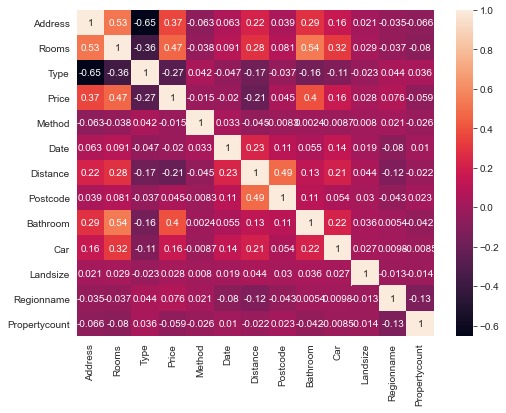

In [213]:
display(df_house)
data = df_house.corr()
plt.figure(figsize=[8,6])
sns.heatmap(data,annot=True)

## Apply the model for prediction with holdout and cross validation.

- Holdout

In [233]:
data = df_house
data_1 = df_house
data_1['Price']= np.log1p(df_house['Price'].dropna())

In [215]:
X= data[['Rooms','Car','Landsize','Distance', 'Address', 'Bathroom','Type','Method','Date','Postcode','Regionname','Propertycount']]
y= data['Price']

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=512)
lm =LinearRegression(normalize=False,n_jobs=-1)
lm.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [217]:
print(lm.intercept_)

-30421658.543043166


In [218]:
lm.coef_

array([ 2.44513331e+05,  4.77658053e+04,  4.15717544e+00, -4.85005326e+04,
        2.51668927e+05,  1.49174028e+05, -6.17690898e+04, -5.88328454e+03,
        1.31715150e+00,  1.38130254e+03,  1.39172668e+04, -2.80782958e+00])

In [219]:
prediction = lm.predict(X_test)
prediction

array([1434969.48579447, 1072312.51952601, 1455514.68220694, ...,
       1311532.81603699, 1034374.38505972, 1253511.23591981])

In [220]:
y_test.head()

17145    1462000.0
34756     950000.0
3254     1506000.0
17250     817000.0
29851    1246000.0
Name: Price, dtype: float64

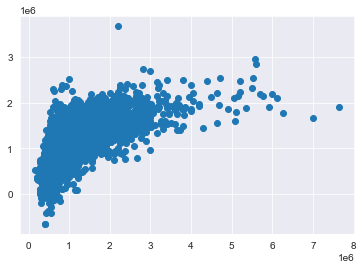

In [221]:
plt.scatter(y_test,prediction)

<AxesSubplot:xlabel='Price', ylabel='Density'>

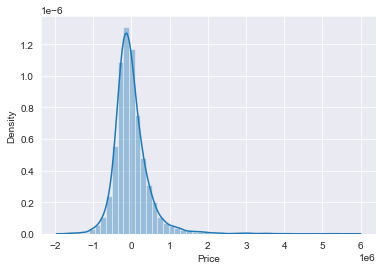

In [222]:
sns.distplot(y_test-prediction)

In [223]:
prediction_1 = lm.predict(X_train)
prediction_1

array([1219475.59547342,  924144.58138731,  553879.39512276, ...,
        218337.64205327, 1889004.99856823, 1147437.72992336])

In [224]:
y_train.head()

8732     1100000.0
19454     661000.0
4870      400000.0
9026      515000.0
19884     457000.0
Name: Price, dtype: float64

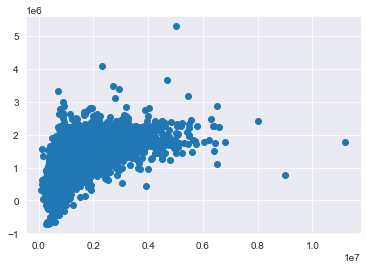

In [225]:
plt.scatter(y_train,prediction_1)

<AxesSubplot:xlabel='Price', ylabel='Density'>

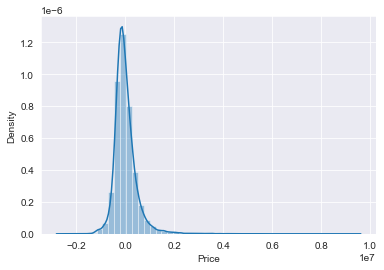

In [226]:
sns.distplot(y_train-prediction_1)

- Cross Validation

In [227]:
model_CV = linear_model.LinearRegression()

In [228]:
B_score = []
cv = []

for i in range(2, 7):
    model = Ridge(alpha=0, normalize=True)
    score = cross_val_score(model, X_train, y_train, cv=i).mean()
    B_score.append(score)
    cv.append(i)
    
    print("cv: %d --- score: %2.4f" % (i, score))
    
px.line(x=cv, y=B_score, 
        template='simple_white', 
        title='<b>K-fold vs R2</b>',
        labels={'x':'K-fold', 'y':'R2'})

cv: 2 --- score: 0.4459
cv: 3 --- score: 0.4461
cv: 4 --- score: 0.4461
cv: 5 --- score: 0.4457
cv: 6 --- score: 0.4466


- If the Price is Gauss Distribution:

- Holdout

In [234]:
X= data_1[['Rooms','Car','Landsize','Distance', 'Address', 'Bathroom','Type','Method','Date','Postcode','Regionname','Propertycount']]
y= data_1['Price']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=512)
lm =LinearRegression(normalize=False,n_jobs=-1)
lm.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [236]:
prediction = lm.predict(X_test)
prediction

array([14.12737382, 13.79475555, 14.01755823, ..., 13.89891954,
       13.7723539 , 13.79965173])

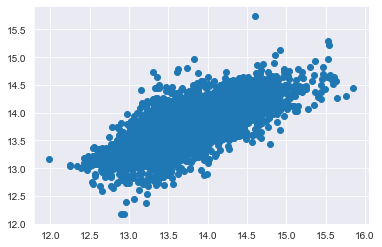

In [237]:
plt.scatter(y_test,prediction)

<AxesSubplot:xlabel='Price', ylabel='Density'>

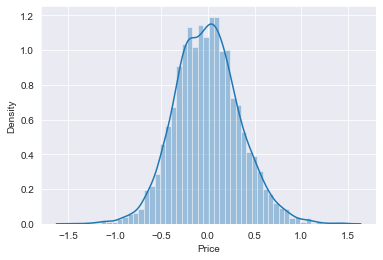

In [238]:
sns.distplot(y_test-prediction)

- Cross validation

In [239]:
model_CV = linear_model.LinearRegression()

B_score = []
cv = []

for i in range(2, 7):
    model = Ridge(alpha=0, normalize=True)
    score = cross_val_score(model, X_train, y_train, cv=i).mean()
    B_score.append(score)
    cv.append(i)
    
    print("cv: %d --- score: %2.4f" % (i, score))
    
px.line(x=cv, y=B_score, 
        template='simple_white', 
        title='<b>K-fold vs R2</b>',
        labels={'x':'K-fold', 'y':'R2'})

cv: 2 --- score: 0.5345
cv: 3 --- score: 0.5343
cv: 4 --- score: 0.5342
cv: 5 --- score: 0.5339
cv: 6 --- score: 0.5348


## Using PCA, apply the model with holdout and cross validation.

- Holdout

In [240]:
C = Pipeline([
                ('PCA', PCA(n_components=11)),
                ('Linear Regression', Ridge(alpha=0, normalize=True))])
C.fit(X_train, y_train)
prediction = lm.predict(X_test)
C.score(X_test, y_test)

0.5363485561007697

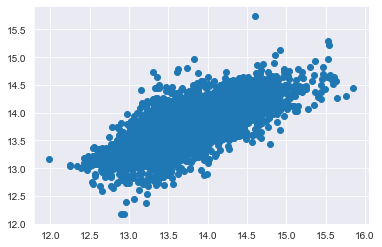

In [241]:
plt.scatter(y_test,prediction)

<AxesSubplot:xlabel='Price', ylabel='Density'>

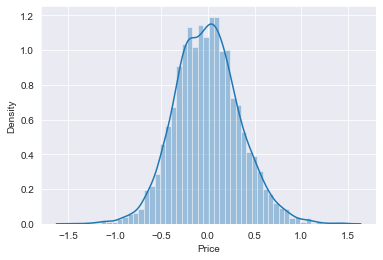

In [242]:
sns.distplot(y_test-prediction)

- Cross Validation

In [243]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

step = [( 'PCA'     , PCA()   ),
        ( 'Lin_Reg' , RidgeCV(alphas=[0], cv=6) )]

D = Pipeline(step)
D.fit(X_train, y_train)
score = D.score(X_test, y_test)
print("D's score: %2.4f" % score)

D's score: 0.5550


## Conclusions

- Model is not so good from the start so the score is not good whatsoever.
- In this model, PCA is better than.
- Need to remove more outliers so the model could be better.